### Edgar Moises Hernandez-Gonzalez
#### 20/01/20-29/10/20
#### Espectrograma con CWT de una señal de 4 segundos de EEG a 250Hz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt

In [2]:
#canal = pd.read_csv("MI-EEG-A01T.csv", header=None).iloc[:, 7000:8000] #canal C3
canal = pd.read_csv("MI-EEG-A01T.csv", header=None).iloc[:, 11000:12000] #canal C4 (usar este)

In [3]:
# Señal EEG del sujeto 1
# 4 segundos con fs=250Hz

fs = 250
time = np.arange(0, 4, 1/fs)
sig = canal.iloc[2] #la muestra 2 es mano derecha
sig.shape

(1000,)

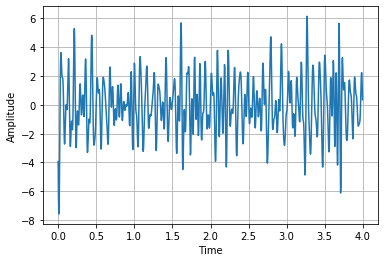

In [4]:
plt.plot(time, sig)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

### Morlet

In [5]:
# calcular las escalas de 8-30Hz para Morlet wavelets
# f = scale2frequency(wavelet, scale)/sampling_period
escalas = pywt.scale2frequency('morl', np.arange(8,31)) / (1/fs)
print(escalas)

[25.390625   22.56944444 20.3125     18.46590909 16.92708333 15.625
 14.50892857 13.54166667 12.6953125  11.94852941 11.28472222 10.69078947
 10.15625     9.67261905  9.23295455  8.83152174  8.46354167  8.125
  7.8125      7.52314815  7.25446429  7.00431034  6.77083333]


In [6]:
# Escalograma (CWT)
# pywt.cwt(senal, escalas, tipo wavelet, periodo de muestreo = (1 / fs))
coef, freqs = pywt.cwt(sig, escalas, 'morl', sampling_period = (1 / fs))

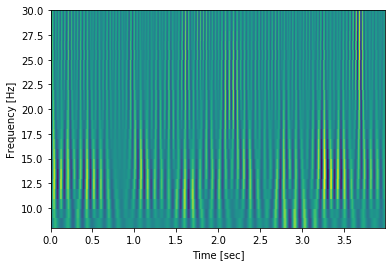

In [7]:
plt.pcolormesh(time, freqs, coef)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

(23, 1000)


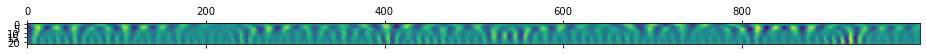

In [8]:
print(coef.shape)
plt.matshow(coef)
plt.show()

### Complex Morlet

In [9]:
# calcular las escalas de 8-30Hz para complex Morlet wavelets
# f = scale2frequency(wavelet, scale)/sampling_period
escalas = pywt.scale2frequency('cmor3-3', np.arange(8,31)) / (1/fs)
print(escalas)

[93.75       83.33333333 75.         68.18181818 62.5        57.69230769
 53.57142857 50.         46.875      44.11764706 41.66666667 39.47368421
 37.5        35.71428571 34.09090909 32.60869565 31.25       30.
 28.84615385 27.77777778 26.78571429 25.86206897 25.        ]


In [10]:
# Escalograma (CWT)
# pywt.cwt(senal, escalas, tipo wavelet, periodo de muestreo = (1 / fs))
coef, freqs = pywt.cwt(sig, escalas, 'cmor3-3', sampling_period = (1 / fs))

In [11]:
# dado que cmor3-3 genera numeros complejos, calcular el modulo
x = abs(coef)

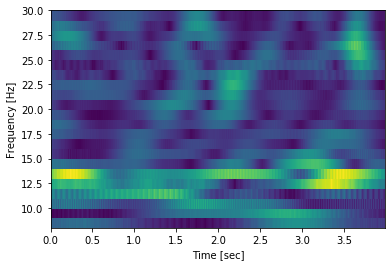

In [12]:
plt.pcolormesh(time, freqs, x)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

(23, 1000)


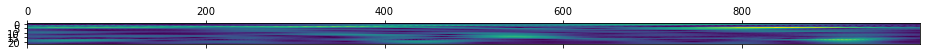

In [13]:
print(x.shape)
plt.matshow(x)
plt.show()